# Ocean data handling

In this notebook we show how ocean data is handled.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback
from os.path import join
    
import numpy as np
import iris
import iris.quickplot as qplt
import matplotlib
import matplotlib.pyplot as plt

from netcdf_scm.iris_cube_wrappers import CMIP6OutputCube

<IPython.core.display.Javascript object>

In [2]:
plt.style.use('bmh') 
%matplotlib inline

In [3]:
DATA_PATH_TEST = join("..", "tests", "test-data")
DATA_PATH_TEST_CMIP6_OUTPUT_ROOT = join(DATA_PATH_TEST, "cmip6output")

## Test data

For this notebook we use our test data, specifically CMIP6Output from NCAR's CESM2 model.

In [4]:
hfds_file = join(
    DATA_PATH_TEST_CMIP6_OUTPUT_ROOT,
    "CMIP6",
    "CMIP",
    "NCAR",
    "CESM2",
    "historical",
    "r4i1p1f1",
    "Omon",
    "hfds",
    "gr",
    "v20190308",
    "hfds_Omon_CESM2_historical_r4i1p1f1_gr_185001-185006.nc",
)
hfds_file_gn = hfds_file.replace("gr", "gn")

In [5]:
hfds_cube = CMIP6OutputCube()
hfds_cube.load_data_from_path(hfds_file)

hfds_cube_gn = CMIP6OutputCube()
hfds_cube_gn.load_data_from_path(hfds_file_gn)

In [6]:
hfds_cube.cube

<iris 'Cube' of surface_downward_heat_flux_in_sea_water / (W m-2) (time: 6; latitude: 180; longitude: 360)>

In [7]:
hfds_cube_gn.cube

<iris 'Cube' of surface_downward_heat_flux_in_sea_water / (W m-2) (time: 6; -- : 384; -- : 320)>

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


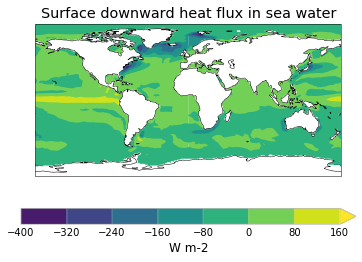

In [8]:
# NBVAL_IGNORE_OUTPUT
time_mean = hfds_cube.cube.collapsed('time', iris.analysis.MEAN)
qplt.contourf(
    time_mean, 
    extend='max',
)
plt.gca().coastlines();

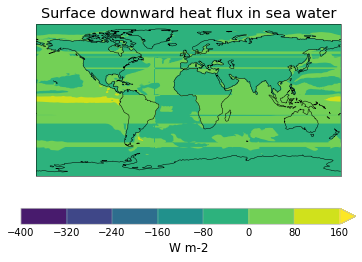

In [9]:
# NBVAL_IGNORE_OUTPUT
time_mean = hfds_cube_gn.cube.collapsed('time', iris.analysis.MEAN)
qplt.contourf(
    time_mean, 
    extend='max',
)
plt.gca().coastlines();

## Getting Cubes

We can get cubes for ocean data in the standard way.

In [10]:
hfds_scm_cubes = hfds_cube.get_scm_cubes(masks=[
    "World",
    "World|Northern Hemisphere",
    "World|Northern Hemisphere|Ocean",
    "World|Ocean",
    "World|Southern Hemisphere",
    "World|Southern Hemisphere|Ocean",
    "World|North Atlantic Ocean",
    "World|El Nino N3.4",
])

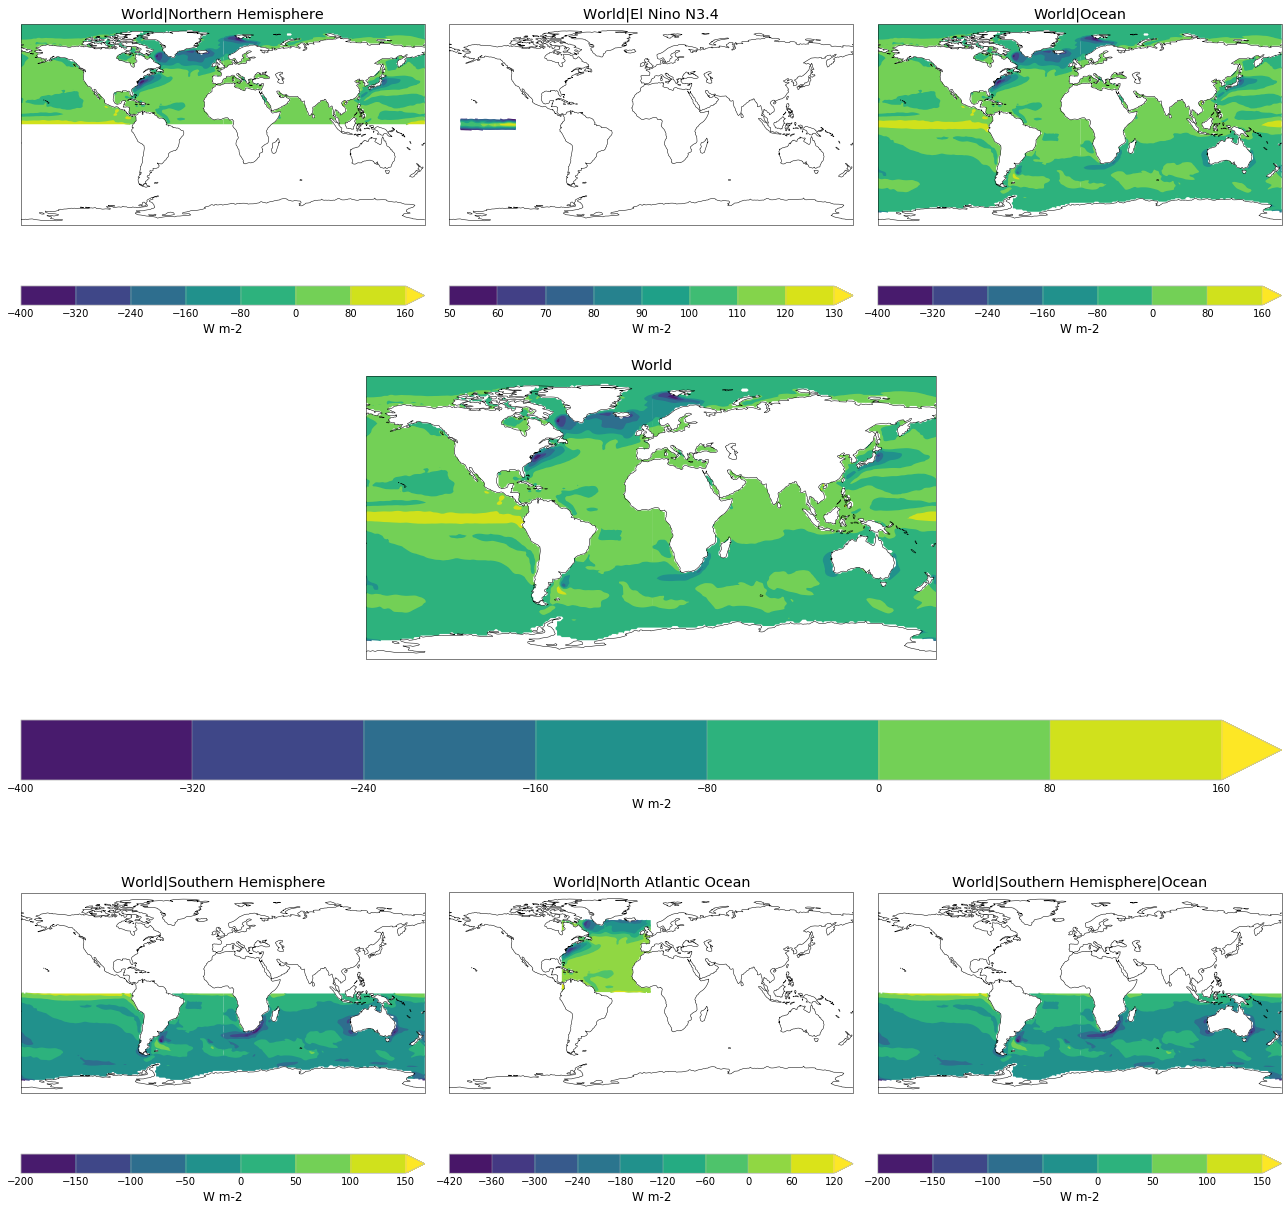

In [11]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=(18, 18))
no_rows = 3
no_cols = 3

total_panels = no_cols * no_rows
rows_plt_comp = no_rows*100
cols_plt_comp = no_cols*10
for i, (label, cube) in enumerate(hfds_scm_cubes.items()):
    if label == "World":
        index = (int((no_rows + 1) / 2))
        plt.subplot(no_rows, 1, index)
    else:
        if label == "World|Northern Hemisphere":
            index = 1
        elif label == "World|Southern Hemisphere":
            index = 1 + (no_rows - 1) * no_cols
        else:
            index = 2
            if "North Atlantic Ocean" in label:
                index += (no_rows - 1) * no_cols
            elif "Ocean" in label:
                index += 1
            if "Southern Hemisphere" in label:
                index += (no_rows - 1) * no_cols
        plt.subplot(no_rows, no_cols, index)
        
    region_time_mean = cube.cube.collapsed('time', iris.analysis.MEAN)
    try:
        qplt.contourf(
            region_time_mean, 
            extend='max',
        )
        plt.title(label)
        plt.gca().coastlines()
    except ValueError:
        print(label)
        
    
plt.tight_layout()

cannot be safely cast to variable data type
Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'latitude'.
Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'longitude'.


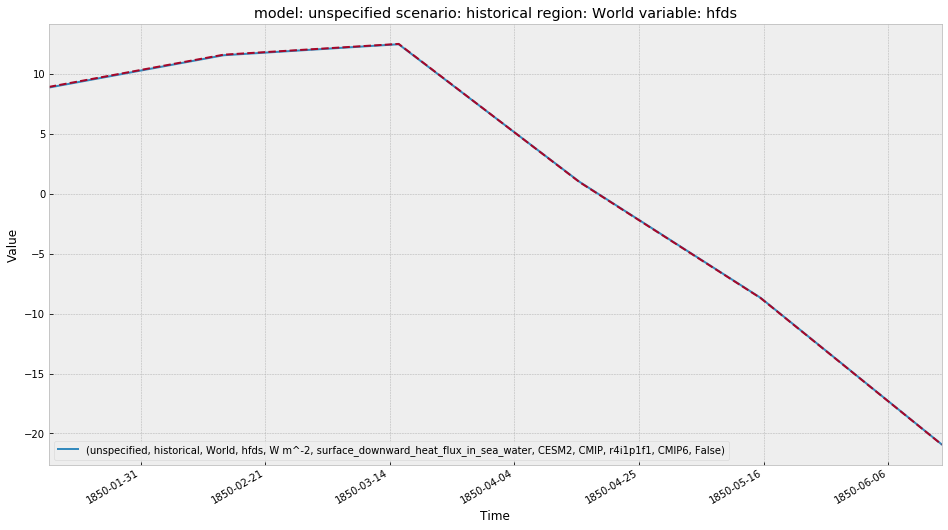

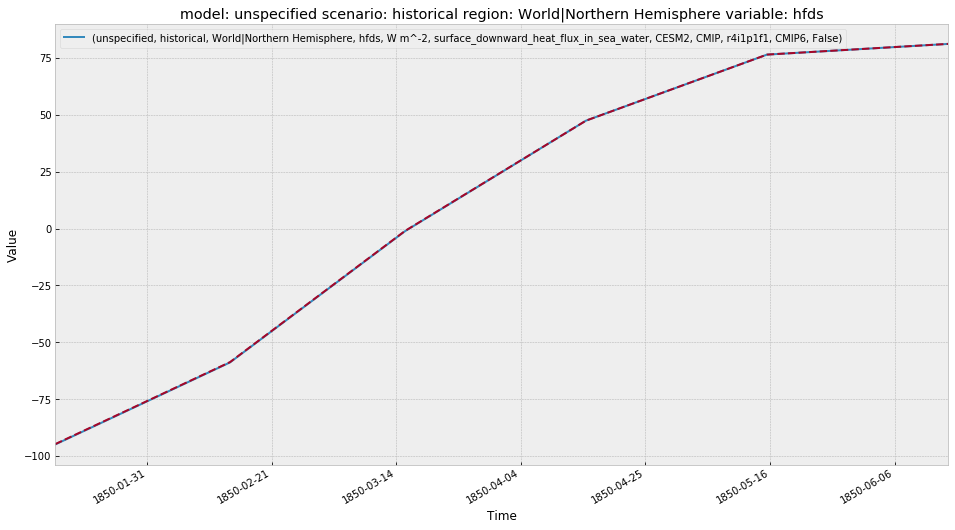

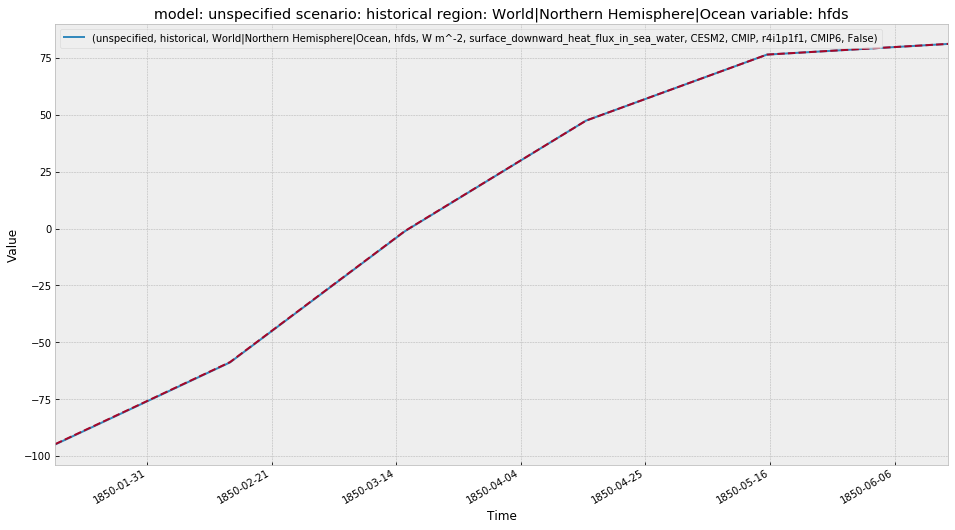

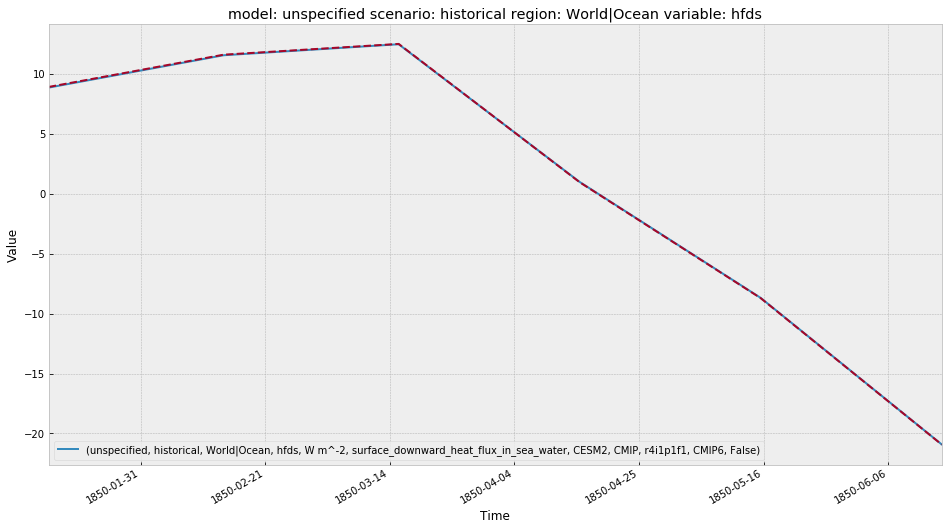

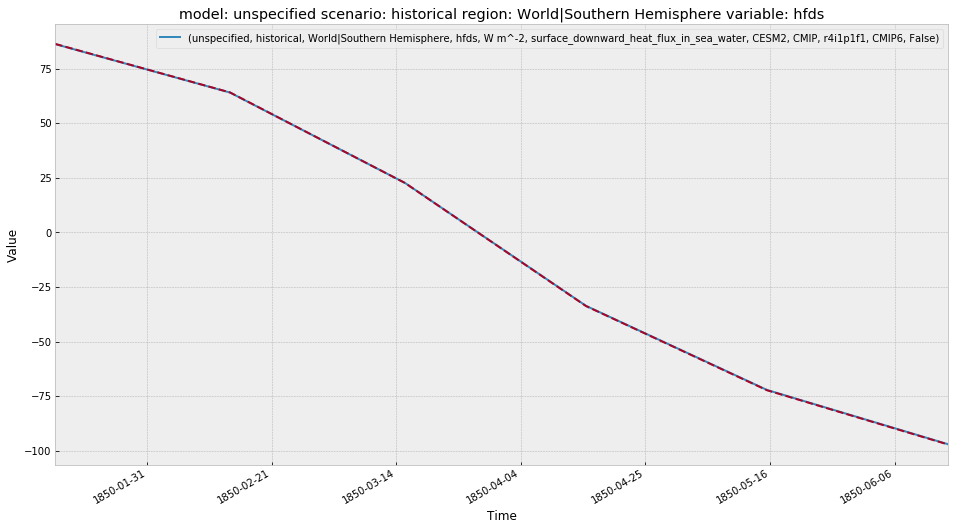

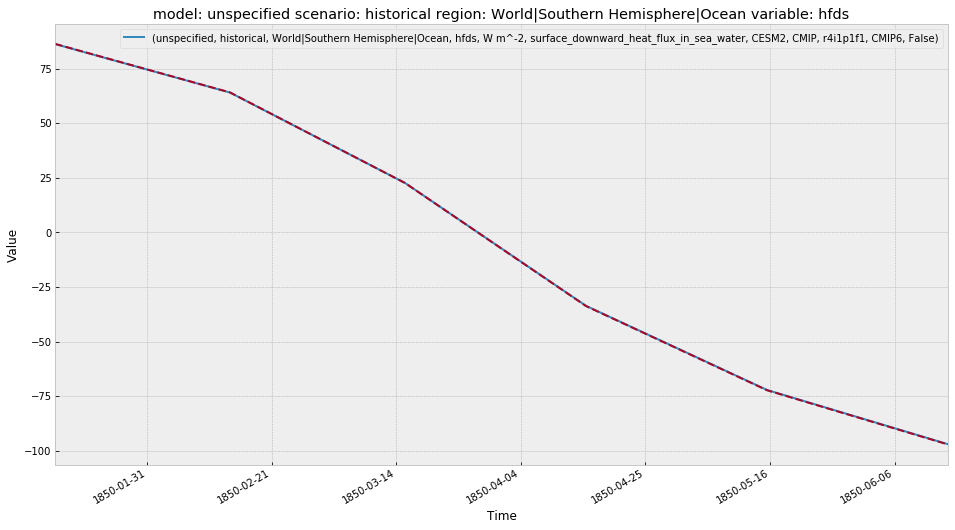

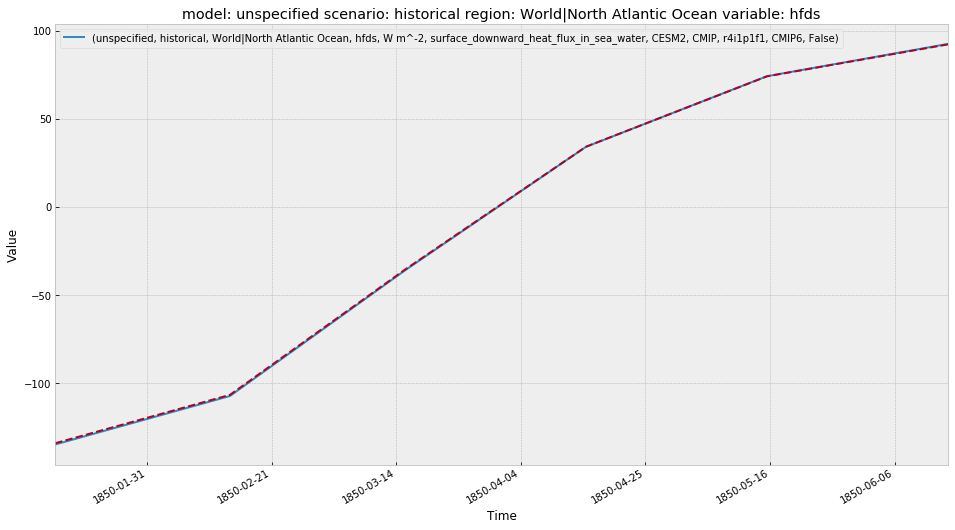

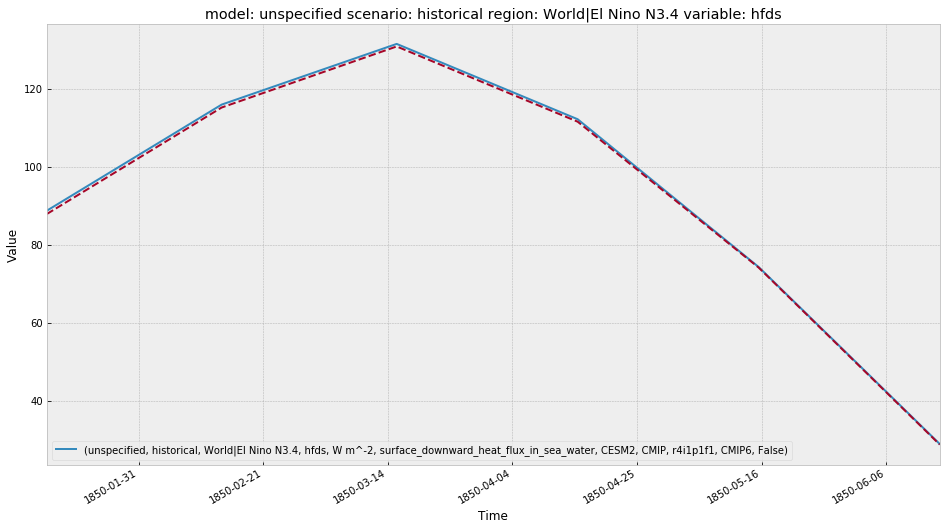

In [12]:
hfds_ts = hfds_cube.get_scm_timeseries(masks=[
    "World",
    "World|Northern Hemisphere",
    "World|Northern Hemisphere|Ocean",
    "World|Ocean",
    "World|Southern Hemisphere",
    "World|Southern Hemisphere|Ocean",
    "World|North Atlantic Ocean",
    "World|El Nino N3.4",
])
hfds_gn_ts = hfds_cube_gn.get_scm_timeseries(masks=[
    "World",
    "World|Northern Hemisphere",
    "World|Northern Hemisphere|Ocean",
    "World|Ocean",
    "World|Southern Hemisphere",
    "World|Southern Hemisphere|Ocean",
    "World|North Atlantic Ocean",
    "World|El Nino N3.4",
])

for region in hfds_ts["region"].unique():
    ax = hfds_ts.filter(region=region).line_plot(figsize=(16, 9))
    hfds_gn_ts.filter(region=region).line_plot(ax=ax, linestyle="--")

In [13]:
hfds_scm_cubes_gn = hfds_cube_gn.get_scm_cubes(masks=[
    "World",
    "World|Northern Hemisphere",
    "World|Northern Hemisphere|Ocean",
    "World|Ocean",
    "World|Southern Hemisphere",
    "World|Southern Hemisphere|Ocean",
    "World|North Atlantic Ocean",
    "World|El Nino N3.4",
])

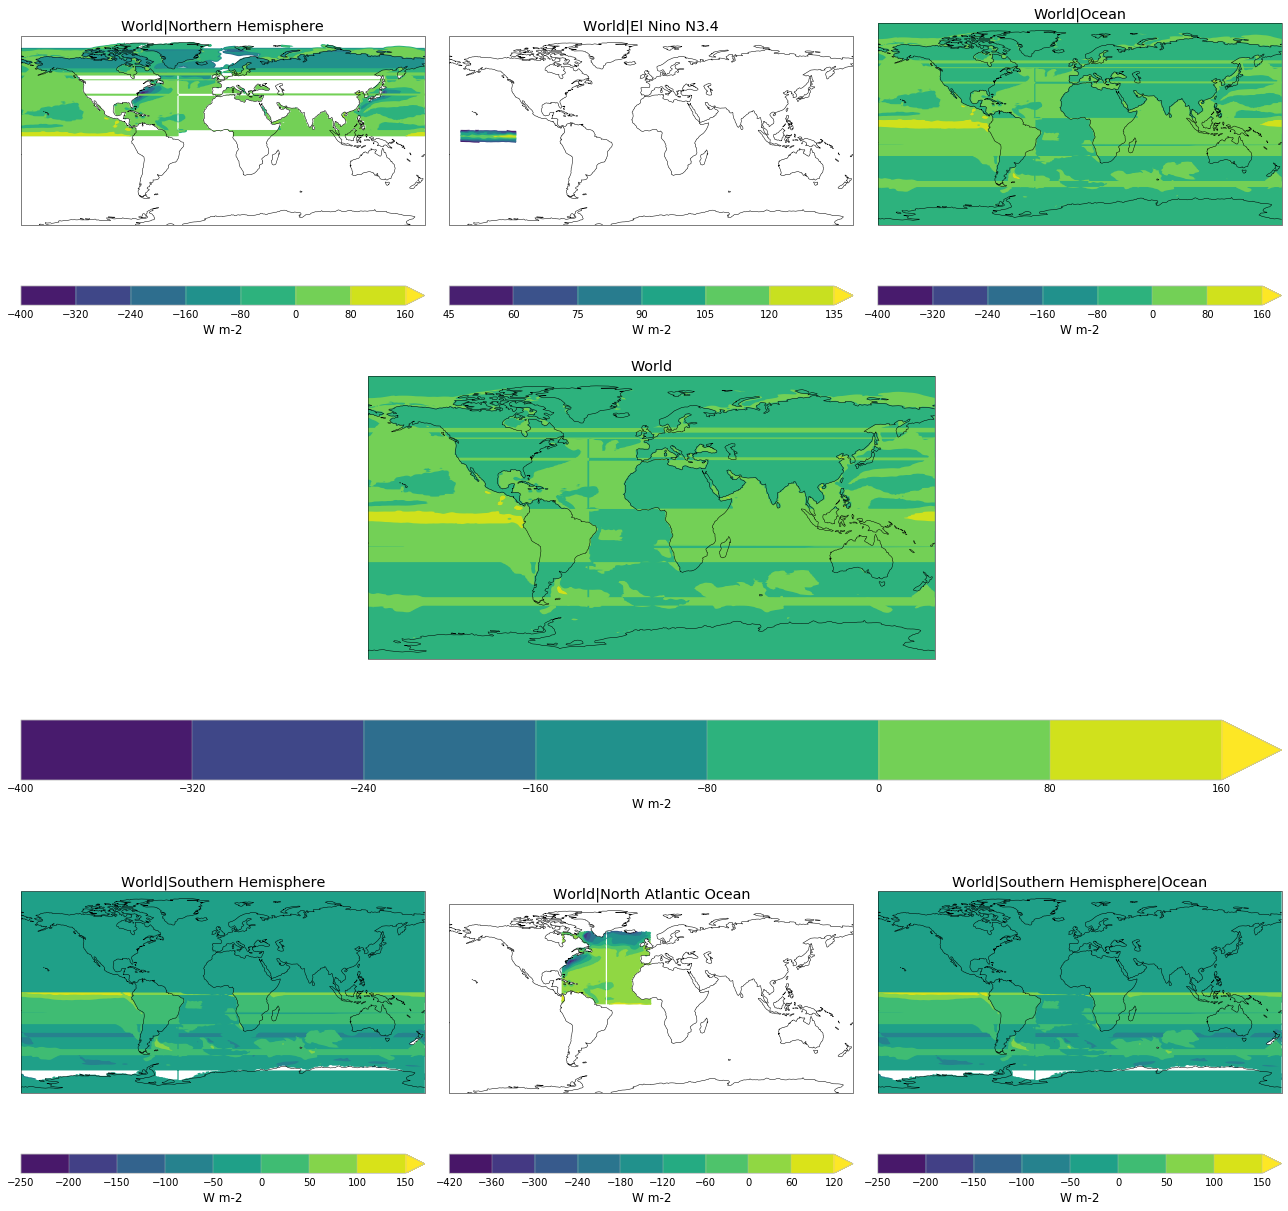

In [14]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=(18, 18))
no_rows = 3
no_cols = 3

total_panels = no_cols * no_rows
rows_plt_comp = no_rows*100
cols_plt_comp = no_cols*10
for i, (label, cube) in enumerate(hfds_scm_cubes_gn.items()):
    if label == "World":
        index = (int((no_rows + 1) / 2))
        plt.subplot(no_rows, 1, index)
    else:
        if label == "World|Northern Hemisphere":
            index = 1
        elif label == "World|Southern Hemisphere":
            index = 1 + (no_rows - 1) * no_cols
        else:
            index = 2
            if "North Atlantic Ocean" in label:
                index += (no_rows - 1) * no_cols
            elif "Ocean" in label:
                index += 1
            if "Southern Hemisphere" in label:
                index += (no_rows - 1) * no_cols
        plt.subplot(no_rows, no_cols, index)
        
    region_time_mean = cube.cube.collapsed('time', iris.analysis.MEAN)
    try:
        qplt.contourf(
            region_time_mean, 
            extend='max',
        )
        plt.title(label)
        plt.gca().coastlines()
    except ValueError:
        print(label)
        
    
plt.tight_layout()

### Land masks

If we request a land mask, a `ValueError` will be raised. This occurs according to the following logic:

1. NetCDF-SCM automatically decides whether a cube is ocean data or not based on the cube's NetCDF attributes 
1. If the cube is ocean data, then all data is assigned to the ocean boxes
1. Hence if we request land data, nothing will match and we will receive a ValueError

In [15]:
# attribute which shows whether cube is ocean data or not
hfds_cube.is_ocean_data

True

In [16]:
# if we try to get the land mask, an error is raised
try:
    hfds_cube.get_scm_cubes(masks=["World|Land"])
except ValueError as e:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
ValueError: Your cube has no data which matches the `World|Land` mask
